<a href="https://colab.research.google.com/github/alexeynick/msu_oil_gas/blob/main/module2_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задачи модуля №2

In [32]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots

import locale

locale.setlocale(locale.LC_ALL, '')
locale._override_localeconv = {'mon_thousands_sep': '_'}

In [33]:
pd.set_option('display.max_colwidth', 100)

## Задача 2.1 Расчет запасов нефти и газа объемным методом

In [34]:
data = {
    'Параметры': ['Площадь нефтеносности залежи',
                  'Эффективная нефтенасыщенная толщина залежи',
                  'Коэффициент пористости',
                  'Коэффициент нефтенасыщенности',
                  'Плотность нефти в поверхностных условиях',
                  'Переводной коэффициент из пластовых условий в поверхностные',
                  'Газовый фактор',
                  'Коэффициент нефтеотдачи',
                  'Добыча нефти с начала разработки на анализируемую дату',
                  ],
        'Единицы измерения': ['м2',
                              'м',
                              'д.ед.',
                              'д.ед.',
                              'т/м3',
                              'д.ед.',
                              'м3/т',
                              'д.ед.',
                              'тыс.т.',
                              ],
         'Значения': [6012,
                     16,
                     0.17,
                     0.515,
                     0.826,
                     0.915,
                     38.7,
                     0.585,
                     2016.9,
                     ]
        }

df = pd.DataFrame(
    data, 
    columns = ['Параметры','Единицы измерения', 'Значения'],
    index=[1, 2, 3, 4, 5, 6, 7, 8, 9])

df

,Параметры,Единицы измерения,Значения
1,Площадь нефтеносности залежи,м2,6012.000
2,Эффективная нефтенасыщенная толщина залежи,м,16.000
3,Коэффициент пористости,д.ед.,0.170
4,Коэффициент нефтенасыщенности,д.ед.,0.515
5,Плотность нефти в поверхностных условиях,т/м3,0.826
6,Переводной коэффициент из пластовых условий в поверхностные,д.ед.,0.915
7,Газовый фактор,м3/т,38.700
8,Коэффициент нефтеотдачи,д.ед.,0.585
9,Добыча нефти с начала разработки на анализируемую дату,тыс.т.,2016.900


$$Q_{ИЗВ} = F \cdot h_{НН} \cdot m \cdot K _{НН} \cdot \rho_{Н} \cdot \beta \cdot \eta $$

где:
- $Q_{ИЗВ}$ - извлекаемые (промышленные) запасы нефти, $т$;
- $F$ — площадь нефтеносности залежи, $м^{2}$;
- $h_{НН}$ — эффективная нефтенасыщенная толщина залежи, $м$;
- $m$ — коэффициент открытой пористости нефтесодержащих пород;
- $K _{НН}$ — коэффициент насыщения пласта нефтью (коэффициент нефтенасыщенности);
- $\rho_{Н}$ — плотность нефти в поверхностных условиях, $т/м^{3}$;
- $\beta$ — пересчетный коэффициент, учитывающий усадку нефти $\beta = \cfrac{1}{b}$ (${b}$ - объемный коэффициент пластовой нефти);
- $\eta$ — коэффициент нефтеотдачи (КИН);


$K _{НН}$ - Коэффициент нефтенасыщенности или газонасыщенности (oil or gas saturation factor) - отношение объема нефти (газа), содержащейся в порах (пустотах) пласта, к общему объему всех пор (пустот) нефтеносного (газоносного) пласта в пластовых условиях (М.А. Жданов, 1962; Ф.И. Котяхов, И.Х. Абрикосов, И.С. Гутман, 1970). 

$m$ - в нефтегазопромысловой геологии более важен коэффициент открытой пористости, т.к. он характеризует объем углеводородов, содержащийся в породе. На практике коэффициент открытой пористости определяется в лабораторных условиях по методу Преображенского или по данным геофизических исследований в скважине (ГИС).

Полная пористость – это объем всех пор, находящихся в горной породе.

Открытая пористость – это объем пор, сообщающихся между  cобой. Количественно та и другая пористость выражается коэффициентом пористости, который представляет собой отношение объема пор к объему образца породы


Рассчитать:

- 1) Начальные геологические запасы нефти
- 2) Начальные извлекаемые запасы нефти
- 3) Остаточные геологические запасы нефти
- 4) Остаточные извлекаемые запасы нефти
- 5) Начальные геологические запасы газа
- 6) Начальные извлекаемые запасы газа
- 7) Остаточные балансовые запасы газа
- 8) Остаточные извлекаемые запасы газа

### Расчеты

$Q_{ИЗВ} = Q_{ГЕОЛ} \cdot \eta $

$Q_{ГЕОЛ} = F \cdot h_{НН} \cdot m \cdot K _{НН} \cdot \rho_{Н} \cdot \beta $

$Q_{ОСТ\,ГЕОЛ} = Q_{ГЕОЛ} - Q_{ДОБ} $

$Q_{ОСТ\,ИЗВ} = Q_{ИЗВ} - Q_{ДОБ} $




In [35]:
values = df['Значения']

In [36]:
F_value = values[1]
hnn_value = values[2]
m_value = values[3]
Knn_value = values[4]
rhon_value = values[5]
beta_value = values[6]
eta_value = values[8]
q_dob = values[9]

q_geol = F_value * hnn_value * m_value * Knn_value * rhon_value * beta_value
q_ost_geol = q_geol * eta_value

In [37]:
print('Начальные геологические запасы нефти: {0:,.0f}'.format(q_geol))
print('Начальные извлекаемые запасы нефти: {0:,.0f}'.format(q_ost_geol))
print('Остаточные геологические запасы нефти: {0:,.0f}'.format(q_geol - q_dob))
print('Остаточные извлекаемые запасы нефти: {0:,.0f}'.format(q_ost_geol - q_dob))

Начальные геологические запасы нефти: 6,365
Начальные извлекаемые запасы нефти: 3,724
Остаточные геологические запасы нефти: 4,348
Остаточные извлекаемые запасы нефти: 1,707


$V_{ГЕОЛ} = Q_{ГЕОЛ} \cdot Г $

$V_{ИЗВ} = Q_{ИЗВ} \cdot Г $

$V_{ОСТ\,ГЕОЛ} = Q_{ОСТ\,ГЕОЛ} \cdot Г $

$V_{ОСТ\,ИЗВ} = Q_{ОСТ\,ИЗВ} \cdot Г $

где:
- $Г$ - газовый фактор (объёмное содержание газа в единице массы нефти), $м^{3}/т$

In [38]:
gfac_value = values[7]

print('Начальные геологические запасы газа: {0:,.0f}'.format(q_geol * gfac_value))
print('Начальные извлекаемые запасы газа: {0:,.0f}'.format(q_ost_geol * gfac_value))
print('Остаточные геологические запасы газа: {0:,.0f}'.format((q_geol - q_dob) * gfac_value))
print('Остаточные извлекаемые запасы газа: {0:,.0f}'.format((q_ost_geol - q_dob) * gfac_value))

Начальные геологические запасы газа: 246,324
Начальные извлекаемые запасы газа: 144,100
Остаточные геологические запасы газа: 168,270
Остаточные извлекаемые запасы газа: 66,046


## Задача 2.2 Определение количества нефти, которое возможно добыть при упругом режиме пласта (свободное фонтанирование)

Определить количество нефти, полученное за счет упругого расширения нефти, воды и горной породы, если:
- площадь области нефтеносности $S_{Н}=900\,га$
- законтурная вода занимает площадь $S_{В}=10\,000\,га$
- средняя толщина пласта $h=15\,м$
- пористость пласта $m=0,17$
- водонасыщенность в зоне нефтеносности $\sigma_{В}=20\% $
- коэффициент сжимаемости нефти $\beta_{Н}=6.12 \cdot 10^{-10} м2/Н$
- коэффициент сжимаемости воды $\beta_{В}=4.28 \cdot 10^{-10} м2/Н$
- коэффициент сжимаемости породы $\beta_{С}=2.04 \cdot 10^{-10} м2/Н$. 

Пластовое давление снижается от 30 до 20 МПа.

Также определить коэффициент извлечения нефти (КИН).

Рассчитать:

- 1) Начальный объем нефти
- 2) Объем нефти, вытесняемый из зоны нефтеносности при падении давления за счет сжимаемости нефти и пористой среды
- 3) Объем вытсненной нефти в зоне нефтеносности при падении давления за счет расширения воды и породы в зоне нефтеносности
- 4) Объем нефти, вытесняемый из окружающей зоны водоносности при падении давления за счет упругости воды и пласта
- 5) Рассчитать КИН

### Расчеты

$Q_{ГЕОЛ} = S_{Н} \cdot h \cdot (1 - \sigma_{В}) \cdot m $


$V_{1} = S_{Н} \cdot h \cdot (1 - \sigma_{В}) \cdot m \cdot \beta_{Н} \cdot \Delta P + S_{Н} \cdot h \cdot (1 - \sigma_{В}) \cdot \beta_{С} \cdot \Delta P = $


$=S_{Н} \cdot h \cdot (1 - \sigma_{В}) \cdot (\beta_{Н} \cdot m + \beta_{С}) \cdot \Delta P$


$V_{2} = S_{Н} \cdot h \cdot \sigma_{В} \cdot m \cdot \beta_{В} \cdot \Delta P + S_{Н} \cdot h \cdot \sigma_{В} \cdot \beta_{С} \cdot \Delta P = $


$=S_{Н} \cdot h \cdot \sigma_{В} \cdot (\beta_{В} \cdot m + \beta_{С}) \cdot \Delta P$


$V_{3} = S_{В} \cdot h \cdot m \cdot \beta_{В} \cdot \Delta P + S_{Н} \cdot h \cdot \beta_{С} \cdot \Delta P = $


$=S_{Н} \cdot h \cdot (\beta_{В} \cdot m + \beta_{С}) \cdot \Delta P$


$КИН = \cfrac{V_{1} + V_{2} + V_{3}}{Q_{ГЕОЛ}} $




In [39]:
HA_TO_SQRTM = 10000

In [40]:
sn_value = 900
sv_value = 10000
hnn_value = 15
m_value = 0.17
sigmav_value = 0.2
betan_value = 6.12 * 10**-10
betav_value = 4.28 * 10**-10
betas_value = 2.04 * 10**-10
p1 = 30 * 10**6
p2 = 20 * 10**6

q_geol = sn_value * HA_TO_SQRTM * hnn_value * (1 - sigmav_value) * m_value
v_1 = sn_value * HA_TO_SQRTM * hnn_value * (1 - sigmav_value) * (betan_value * m_value + betas_value) * (p1 - p2)
v_2 = sn_value * HA_TO_SQRTM * hnn_value * sigmav_value * (betav_value * m_value + betas_value) * (p1 - p2)
v_3 = sv_value * HA_TO_SQRTM * hnn_value * (betav_value * m_value + betas_value) * (p1 - p2)

In [41]:
print('Начальный объем нефти: {0:,.0f}'.format(q_geol))
print('Объем нефти, вытесняемый из зоны нефтеносности при падении давления за счет сжимаемости нефти и пористой среды: {0:,.0f}'.format(v_1))
print('Объем вытсненной нефти в зоне нефтеносности при падении давления за счет расширения воды и породы в зоне нефтеносности: {0:,.0f}'.format(v_2))
print('Объем нефти, вытесняемый из окружающей зоны водоносности при падении давления за счет упругости воды и пласта: {0:,.0f}'.format(v_3))
print('КИН: {0:,.2%}'.format((v_1 + v_2 + v_3) / q_geol))

Начальный объем нефти: 18,360,000
Объем нефти, вытесняемый из зоны нефтеносности при падении давления за счет сжимаемости нефти и пористой среды: 332,683
Объем вытсненной нефти в зоне нефтеносности при падении давления за счет расширения воды и породы в зоне нефтеносности: 74,725
Объем нефти, вытесняемый из окружающей зоны водоносности при падении давления за счет упругости воды и пласта: 4,151,400
КИН: 24.83%


## Задача 2.3 Расчет запасов газа по методу падения давления

$Q_{ИЗВ} = \cfrac{(Q_{2} - Q_{1}) \cdot (P_{1} \cdot \alpha_{1} - P_{K} \cdot \alpha_{K})}{(P_{1} \cdot \alpha_{1} - P_{2} \cdot \alpha_{2})} 
 $

где:
- $Q_{ИЗВ}$ - извлекаемые запасы газа, $млрд\,м^{3}$;
- $Q_{1}$ — количество газа, добытого с начала разработки на 1-ю дату замера, $млрд\,м^{3}$;
- $Q_{2}$ — количество газа, добытого с начала разработки на 2-ю дату замера, $млрд\,м^{3}$;
- $\alpha_{1}$ — поправка за отклонение от идеального газа на 1-ю дату замера;
- $\alpha_{2}$ — поправка за отклонение от идеального газа на 2-ю дату замера;
- $\alpha_{K}$ — поправка за отклонение от идеального газа (конечные условия);
- $P_{1}$ — пластовое давление на 1-ю дату замера, $МПа$;
- $P_{2}$ — пластовое давление на 2-ю дату замера, $МПа$;
- $P_{K}$ — конечное пластовое давление, $МПа$;

In [42]:
q1_value = 10
q2_value = 100
p1_value = 28
p2_value = 12
pk_value = 1
alpha1_value = 1 / 0.9828
alpha2_value = 1 / 0.9703
alphak_value = 1 / 0.9946


In [43]:
ATM_TO_MPA = 101325

In [44]:
q_geol = (
    (q2_value - q1_value) 
    * (p1_value * ATM_TO_MPA * alpha1_value - pk_value * ATM_TO_MPA * alphak_value)
    / (p1_value * ATM_TO_MPA * alpha1_value - p2_value * ATM_TO_MPA * alpha2_value)
)

In [45]:
print('Извлекаемые запасы газа: {0:,.2f} млрд. куб. м'.format(q_geol))

Извлекаемые запасы газа: 153.42 млрд. куб. м


## Задача 2.4 Определение необходимого числа скважин в условиях максимальной добычи извлекаемых запасов 

При проектировании разработки нефтяного месторождения в нем было выделено два объекта разработки. Пласты характеризуются неоднородным строением и содержат много пропластков и линз. 

В результате лабораторного изучения процесса вытеснения нефти из пород-коллекторов определены коэффициенты вытеснения $K_{ВЫТ1}=0,7$ и $K_{ВЫТ2}=0,6$ для первого и второго объектов, а также получены зависимости коэффициентов охвата первого и второго объектов воздействием $K_{ОХВ1}$, $K_{ОХВ2}$ от соответствующих параметров плотности сеток скважин $S_{C1}$, $S_{C2}$, они имеют вид:
- $K_{ОХВ1}=1-0,055 \cdot S_{C1}$
- $K_{ОХВ2}=1-0,00833 \cdot S_{C2}$

Геологические запасы $Q_{Г1}=80$ млн т, $Q_{Г2}=30$ млн т. Площадь нефтеносности $S_{1}=5000$ га, $S_{2}=1200$ га.
На оба объекта решено пробурить n=150 скважин.

Найти какое число скважин следует пробурить на каждый объект разработки с тем, чтобы суммарные извлекаемые запасы для месторождения в целом получились максимальными.

$КИН = \cfrac{Q_{ИЗВ}}{Q_{ГЕОЛ}}$

$КИН = K_{ВЫТ} \cdot K_{ОХВ} \cdot K_{ЗАВ}$

где:

- $K_{ВЫТ}$ - Коэффициент вытеснения нефти водой - отношение извлеченной из пласта нефти к ее запасам, первоначально находившимся в части пласта, подверженной воздействию заводнением. Определяется лабораторно на образцах породы.
- $K_{ОХВ}$ - Коэффициент охвата - отношение запасов нефти, первоначально находившихся в части пласта, подверженной воздействию заводнением, к геологическим запасам нефти в пласте
- $K_{ЗАВ}$ - Коэффициент заводнения - это отношение накопленной добычи нефти к дренируемым запасам. Характеризует ту часть дренируемых запасов, которую возможно добыть.

### Расчеты

$n=n_{1} + n_{2}$

$S_{С1} = \cfrac{S_{1} } {n_{1}}, S_{С2} = \cfrac{S_{2} } {n_{2}} $

$Q_{ИЗВ1} = Q_{Г1} \cdot КИН_{1} = Q_{Г1} \cdot K_{ВЫТ1} \cdot K_{ОХВ1} = Q_{Г1} \cdot K_{ВЫТ1} \cdot (1 - 0.055 \cdot S_{C1})$

$Q_{ИЗВ2} = Q_{Г2} \cdot КИН_{2} = Q_{Г2} \cdot K_{ВЫТ2} \cdot K_{ОХВ2} = Q_{Г2} \cdot K_{ВЫТ2} \cdot (1 - 0.00833 \cdot S_{C2})$

$Q_{\Sigma} = Q_{ИЗВ1} + Q_{ИЗВ2} = $

$ = Q_{Г1} \cdot K_{ВЫТ1} + Q_{Г2} \cdot K_{ВЫТ2} - \cfrac{0.055 \cdot Q_{Г1} \cdot K_{ВЫТ1} \cdot S_{1}}{n_{1}} - \cfrac{0.00833 \cdot Q_{Г2} \cdot K_{ВЫТ2} \cdot S_{2}}{n - n_{1}} = $

$ = A - \cfrac{B}{n_{1}} - \cfrac{C}{n-n_{1}}$

Найдем локальный экстремум $Q_{\Sigma}$ как функции от $n_{1}$

$Q_{\Sigma}^{'} = 0 $

$\cfrac{dQ_{\Sigma}}{dn} = \cfrac{B}{n_{1}^{2}} - \cfrac{C}{(n-n_{1})^{2}} = 0$

$(B-C) \cdot n_{1}^{2} - 2Bn \cdot n_{1} + Bn^{2}= 0$


Формула нахождения корней квадратных уравнений с помощью дискриминанта:

$a \cdot x^2 + b \cdot x + c = 0$

$x_{1,2} = \cfrac{-b\pm\sqrt{D}}{2a}$,

где

$D = b^2 - 4ac$

Соответственно:

$D = 4B^2n^2 - 4Bn^2(B-C) = 4B^2n^2 - 4B^2n^2 + 4BCn^2$

$\sqrt{D} = 2n \cdot \sqrt{B} \cdot \sqrt{C}$

$n_{1,2} = \cfrac{2Bn\pm2n \cdot \sqrt{B} \cdot \sqrt{C}}{2(B-C)} = n \cdot \cfrac{B\pm\sqrt{B} \cdot \sqrt{C}}{(B-C)}$

$n_{1} = \cfrac{n\sqrt{B}}{\sqrt{B}-\sqrt{C}}$

$n_{2} = \cfrac{n\sqrt{B}}{\sqrt{B}+\sqrt{C}}$

In [46]:
s1_value = 5000
s2_value = 1200
q1_geol = 80
q2_geol = 30
kvyt1_value = 0.7
kvyt2_value = 0.6

B_value = 0.055 * q1_geol * kvyt1_value * s1_value
C_value = 0.00833 * q2_geol * kvyt2_value * s2_value

In [47]:
B_value ** 0.5

124.09673645990857

In [48]:
C_value ** 0.5

13.413724315043902

In [49]:
150*(B_value ** 0.5) / (B_value ** 0.5 - C_value ** 0.5)

168.17856786028875

Подходящее решение:

In [50]:
150*(B_value ** 0.5) / (B_value ** 0.5 + C_value ** 0.5)

135.367959383472

Соответственно:

$n_{1} = 135$

$n_{2} = 15$

## Задача 2.5 Определение параметров по методу материального баланса

Определить текущую нефтенасыщенность $S_{Н}$ нефтяной залежи на различные моменты времени, когда пластовое давление в процессе разработки при режиме растворенного газа $P_1 = 21.0\;МПа, P_2=18.4\;МПа, P_3=17\;МПа$. 

Основные данные о параметрах нефти и газа приведены в таблице. 
Давление насыщения $P_Н = 22\;МПа$. Насыщенность порового объема связанной водой $S_{СВ} = 0.12$.

### Решение

При упругом режиме параметр нефтенасыщенности постоянен $S_{Н}=Const$

В нашем случае пластовое давление опустилось ниже давления насыщения, соответственно добыча идет в режиме растворенного газа. Необходимо определить $S_{Н}$ в различные моменты времени.

В пластовых условиях (при пластовых давлениях) газ находится в растворённом состоянии и только при снижении давления начинает выделяться из нефти. 
Количество растворённого в нефти газа характеризуется понятием газовый фактор (Г). 
Этот показатель используется при разработке нефтяных и газонефтяных месторождений.
Газовый фактор представляет собой объёмное содержание газа в единице массы нефти $Г = \cfrac{Q_Г}{Q_Н}$, единица измерения - $м^3/т$.

Заданные параметры:

- $b_{Н}$ - объемный коэффициент нефти
- $b_{Н0}$ - объемный коэффициент нефти при давлении насыщения
- $b_{Г}$ - объемный коэффициент газа
- $Г_0$ - газовый фактор при давлении насыщения
- $Г$ - текущий газовый фактор
- $\overlineГ$ - усредненный газовый фактор


$КИН = \cfrac{Q_{НАК}}{Q_{ГЕОЛ}}$

${Q_{ГЕОЛ}} = Q_{НАК}\cdot \cfrac{(b_{Н} + (\overlineГ - Г) \cdot b_{Г})}{b_{Н} - b_{Н0} + (Г_0 - Г) \cdot b_{Г}}$

$S_{Н}=(1 - КИН) \cdot \cfrac{b_{Н}}{b_{Н0}} \cdot (1 - S_{СВ}) = (1 - \cfrac{b_{Н} - b_{Н0} + (Г_0 - Г) \cdot b_{Г}}{(b_{Н} + (\overlineГ - Г) \cdot b_{Г})}) \cdot \cfrac{b_{Н}}{b_{Н0}} \cdot (1 - S_{СВ})$

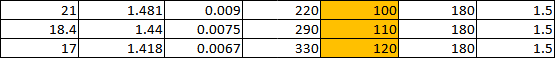

In [51]:
b_n0 = 1.5
g_0 = 180
s_w = 0.12

df_data = pd.DataFrame(
    { 'p' : [21, 18.4, 17],
     'b_n' : [1.481, 1.44, 1.42],
     'b_g' : [0.009, 0.0075, 0.0067],
     'g_cur' : [100, 110, 120],
     'g_mid' : [220, 290, 330],
     }
)

In [52]:
df_data['kin'] = np.round(
    (df_data['b_n'] - b_n0 + (g_0 - df_data['g_cur']) * df_data['b_g'] ) / 
    (df_data['b_n'] + (df_data['g_mid'] - df_data['g_cur']) * df_data['b_g'])
    , 3
)

df_data['s_n'] = np.round(
    (1 - df_data['kin']) * df_data['b_n'] / b_n0 * (1 - s_w)
    , 2
)

In [53]:
df_data

,p,b_n,b_g,g_cur,g_mid,kin,s_n
0,21.0,1.481,0.0090,100,220,0.274,0.63
1,18.4,1.440,0.0075,110,290,0.167,0.70
2,17.0,1.420,0.0067,120,330,0.114,0.74


In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['p'], y=df_data['kin'],
                    mode='lines+markers',
                    name='КИН'))

fig.add_trace(go.Scatter(x=df_data['p'], y=df_data['s_n'],
                    mode='lines+markers',
                    name='Нефтенасыщенность'))

fig.update_layout( 
    xaxis=dict(
        domain=[0.2, 0.9],
        tickmode = 'array',
        tickvals = df_data['p'],
        title='Давление (по времени)',
        autorange = "reversed"
    ),
    title={
        'text': "Динамика параметров при режиме растворенного газа",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1000,
    height=500
)

fig.show()

## Задача 2.8 Экспресс расчет технологических показателей разработки нефтяных месторождений с заводнением

Некоторое вновь открытое нефтяное месторождение с геологическими запасами $G=180$ млн.т. нефти вводится в разработке. Определена зависимость текущей обводненности добываемой продукции $\nu$ от текущей нефтеотдачи (КИН):

$$
\begin{equation}
    \begin{matrix}
    \nu (\eta) =
    \left\{
    \begin{matrix}
    34.8\cdot(\eta-0.1)^2 & 0.1 < \eta \leq 0.25 \\
    1.232\cdot(\eta-0.1)^{1/4} & 0.25 < \eta \leq 0.5 \\
    \end{matrix} \right.
    \end{matrix}
\end{equation}
$$

Требуется осуществить в кратчайший срок оценку возможной добычи нефти и воды из 
месторождения в ближайшие 15 лет. Темп ввода скважин в эксплуатацию на данном 
месторождении предполагается сохранить таким же, как и на месторождение-аналоге 
(сохраняется зависимость $\nu=\nu(\eta)$).

Изменение годового отбора жидкости во времени приведено в таблице:

In [55]:
def calculate_nu_from_kin(kin):
  nu = 0
  if kin > 0.1 and kin <= 0.25:
    nu = 34.8 * (kin - 0.1)**2
  elif kin > 0.25 and kin <= 0.5:
    nu = 1.232 * (kin - 0.1)**0.25

  return np.round(nu, 3)

In [56]:
total_years = 15

df_data = pd.DataFrame(
    { 'year' : range(0, total_years + 1),
     'q_fl_year' : [0.0, 0.9, 1.6, 2.6, 3.5] + list(np.full(total_years - 4, 5))
     }
)

In [57]:
df_nu_kin = pd.DataFrame(
    { 'kin' : np.arange(0.1, 0.51, 0.01),
     }
)

df_nu_kin['nu'] = df_nu_kin.apply(lambda row: calculate_nu_from_kin(row['kin']), axis=1)

In [58]:
fig = make_subplots(
    subplot_titles=[
                    'График годового отбора жидкости по годам',
                    'Зависимость текущей обводненности <br>от текущей нефтеотдачи'],
    rows=1, 
    cols=2)


fig.add_trace(go.Scatter(x=df_data['year'], y=df_data['q_fl_year'],
                    mode='lines+markers',
                    name='Годовой отбор жидкости, 10^6'),
    row=1, col=1)

fig.add_trace(go.Scatter(x=df_nu_kin['kin'], y=df_nu_kin['nu'],
                    mode='lines+markers',
                    name='Обводненность, д.ед.'),
    row=1, col=2)

fig['layout']['xaxis1']['title']='Год'
fig['layout']['xaxis1']['tickangle']=-45
fig['layout']['xaxis1']['tickmode']='array'
fig['layout']['xaxis1']['tickvals']=df_data['year']
fig['layout']['yaxis1']['title']='Годовой отбор жидкости, 10^6'

fig['layout']['xaxis2']['title']='КИН'
fig['layout']['xaxis2']['tickangle']=-45
fig['layout']['yaxis2']['title']='Обводненность, д.ед.'



fig.update_layout( 
    title={
        'text': "Исходные данные",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1400,
    height=700)


fig.show()

In [59]:
df_result = pd.concat([df_data, df_nu_kin[:(total_years + 1)]], axis=1)
df_result.head(5)

,year,q_fl_year,kin,nu
0,0,0.0,0.10,0.000
1,1,0.9,0.11,0.003
2,2,1.6,0.12,0.014
3,3,2.6,0.13,0.031
4,4,3.5,0.14,0.056


In [60]:
df_result['q_fl_total'] = df_result['q_fl_year'].cumsum()
df_result['q_oil_year'] = df_result['q_fl_year'] * (1 - df_result['nu'])
df_result['q_oil_total'] = df_result['q_oil_year'].cumsum()
df_result.tail(5)

,year,q_fl_year,kin,nu,q_fl_total,q_oil_year,q_oil_total
11,11,5.0,0.21,0.421,43.6,2.895,35.0133
12,12,5.0,0.22,0.501,48.6,2.495,37.5083
13,13,5.0,0.23,0.588,53.6,2.060,39.5683
14,14,5.0,0.24,0.682,58.6,1.590,41.1583
15,15,5.0,0.25,0.783,63.6,1.085,42.2433


In [61]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_result['year'], y=df_result['q_fl_year'],
                    mode='lines+markers',
                    name='Годовой отбор жидкости, 10^6'))

fig.add_trace(go.Scatter(x=df_result['year'], y=df_result['q_fl_total'],
                    mode='lines+markers',
                    name='Накопленный объем жидкости, 10^6',
    yaxis="y2"))

fig.add_trace(go.Scatter(x=df_result['year'], y=df_result['q_oil_total'],
                    mode='lines+markers',
                    name='Накопленный объем нефти, 10^6',
    yaxis="y2"))

fig.update_layout( 
    xaxis=dict(
        domain=[0.2, 0.9],
        tickmode = 'array',
        tickvals = df_data['year'],
        tickangle=-45,
        title='Год',
    ),

    yaxis=dict(
        range=[0, 7],
        title="Годовой отбор жидкости, млн т",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),

    yaxis2=dict(
        range=[0, 70],
        title="Накопленные объемы, млн т",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),

    title={
        'text': "Объемы (накопленные объемы) по годам",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    #title='Объемы (накопленные объемы) по годам',
    autosize=False,
    width=1500,
    height=700)


fig.show()